In [9]:
# importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [53]:
# loading the dataset
df=pd.read_csv("C:\\Users\\DELL\\Downloads\\ds_salaries.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
# EDA
df.shape

(607, 12)

In [15]:
df.columns


Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
# it will show us that there are not any null values in the dataset (column)

In [21]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [19]:
df.describe(include = 'object').T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [23]:
 unique_values = df.nunique()#The nunique() function in pandas is used to count the number of unique values in a DataFrame or Series
unique_values

Unnamed: 0            607
work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [27]:
# cheking null values
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [57]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [59]:

# value counts as per experience level

df.experience_level.value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [61]:
df.remote_ratio.value_counts()

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [63]:
df.groupby('employment_type')['job_title'].value_counts().to_frame()

count
employment_type job_title                                
CT              Applied Machine Learning Scientist      1
                Business Data Analyst                   1
                ML Engineer                             1
                Principal Data Scientist                1
                Staff Data Scientist                    1
...                                                   ...
PT              Data Scientist                          2
                3D Computer Vision Researcher           1
                Computer Vision Engineer                1
                Data Analyst                            1
                ML Engineer                             1

[64 rows x 1 columns]

In [65]:
import plotly.graph_objects as go
import plotly.express as px

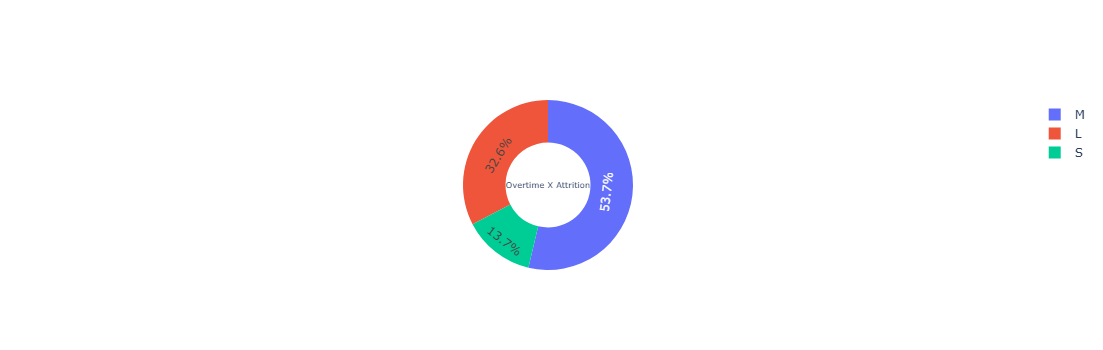

In [73]:
# Doughnut chart

fig = go.Figure()
fig.add_trace(go.Pie(values= [326,198,83],title = 'Overtime X Attrition', labels=['M','L','S'], hole=0.5))

fig.update_layout(autosize=False, width=400, height=350)
fig.show()

In [69]:
# average salary as per job title

df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

job_title
Data Analytics Lead                         405000.000000
Principal Data Engineer                     328333.333333
Financial Data Analyst                      275000.000000
Principal Data Scientist                    215242.428571
Director of Data Science                    195074.000000
Data Architect                              177873.909091
Applied Data Scientist                      175655.000000
Analytics Engineer                          175000.000000
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Applied Machine Learning Scientist          142068.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Clou

<Axes: xlabel='salary_currency', ylabel='count'>

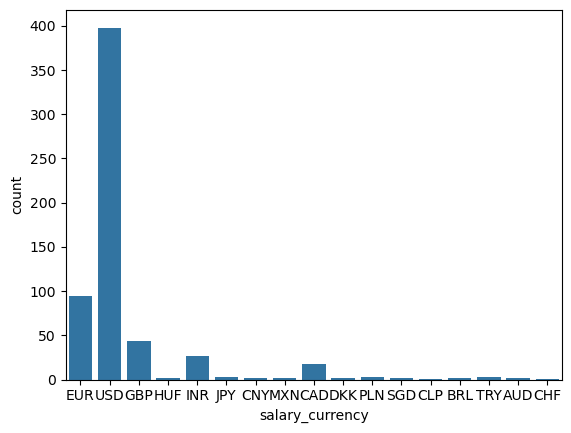

In [75]:
# number of companies as per currency(payout)

sns.countplot(df,x='salary_currency')

<Axes: xlabel='work_year', ylabel='count'>

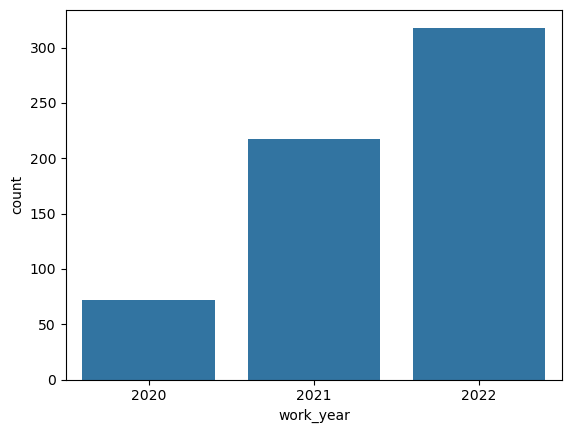

In [77]:
# countplot for work year

sns.countplot(df,x='work_year')

<Axes: xlabel='remote_ratio', ylabel='count'>

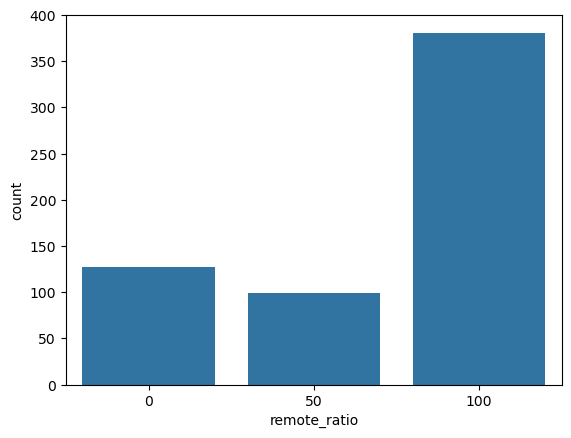

In [79]:
# number of companies as per remote ratio

sns.countplot(df,x='remote_ratio')

<Axes: xlabel='company_size', ylabel='count'>

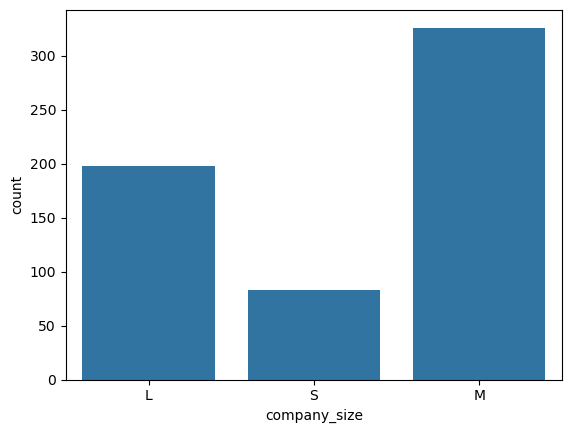

In [81]:
# number of companies as per company size

sns.countplot(df,x='company_size')

In [83]:
pd.reset_option('display.max_rows')
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

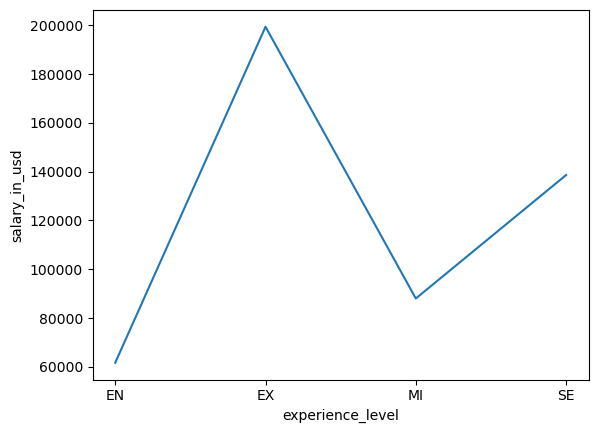

In [85]:
# average salary as per experience level

fd=df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
sns.lineplot(fd,x='experience_level',y='salary_in_usd')

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

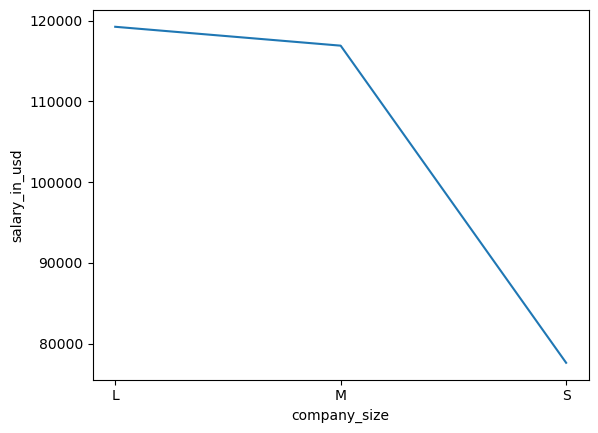

In [87]:
# average salary as per company size

fd=df.groupby('company_size')['salary_in_usd'].mean().reset_index()
sns.lineplot(fd,x='company_size',y='salary_in_usd')


<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

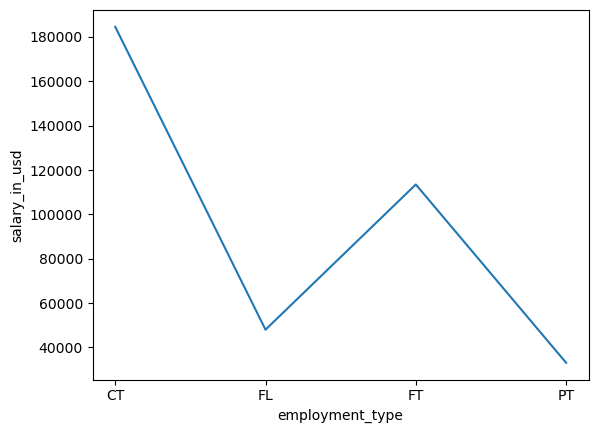

In [89]:
# average salary as per employment type

fd=df.groupby('employment_type')['salary_in_usd'].mean().reset_index()
sns.lineplot(fd,x='employment_type',y='salary_in_usd')

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

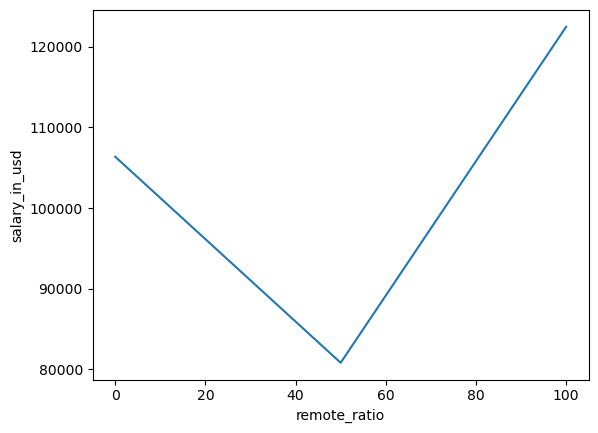

In [91]:
# average salary as per remote ratio

fd=df.groupby('remote_ratio')['salary_in_usd'].mean().reset_index()
sns.lineplot(fd,x='remote_ratio',y='salary_in_usd')

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

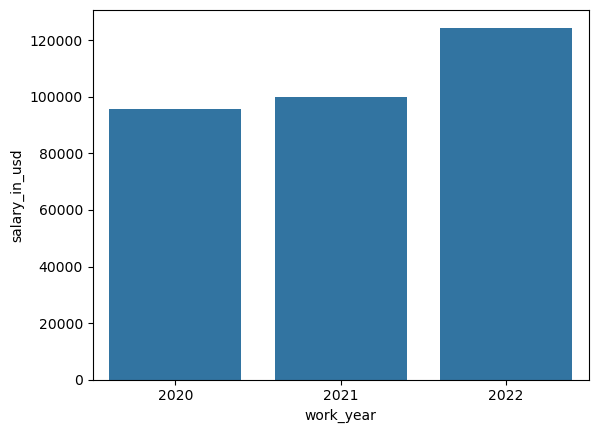

In [93]:
# average salary as per work year

fd=df.groupby('work_year')['salary_in_usd'].mean().reset_index()
sns.barplot(fd,x='work_year',y='salary_in_usd')

<Axes: xlabel='salary_in_usd', ylabel='job_title'>

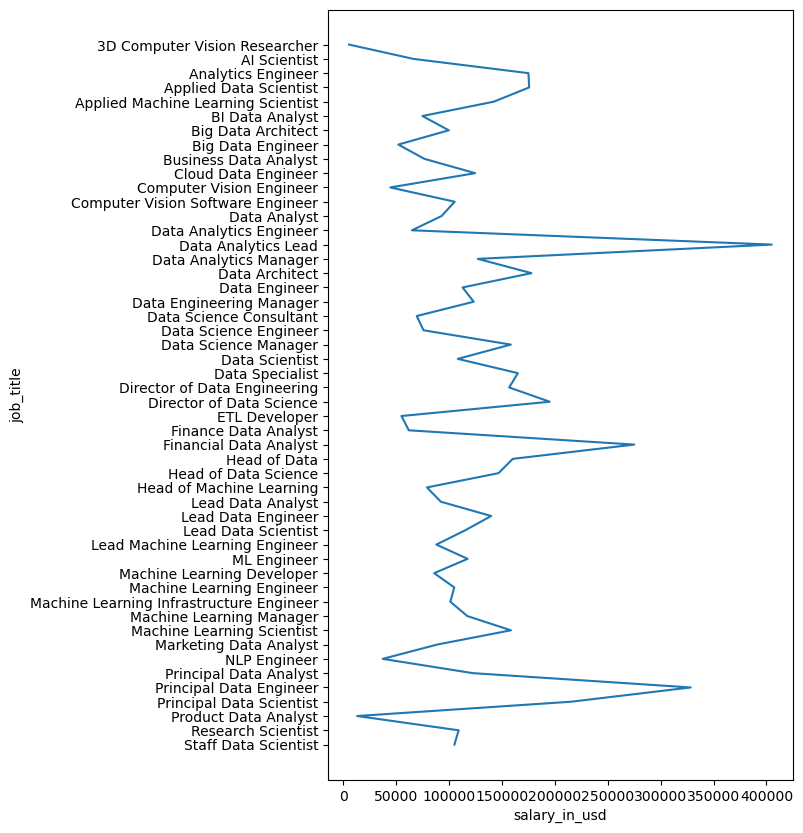

In [95]:
# average salary as per job type

fd=df.groupby('job_title')['salary_in_usd'].mean().reset_index()
plt.figure(figsize=(6,10))
sns.lineplot(fd,x='salary_in_usd',y='job_title',orient='y')

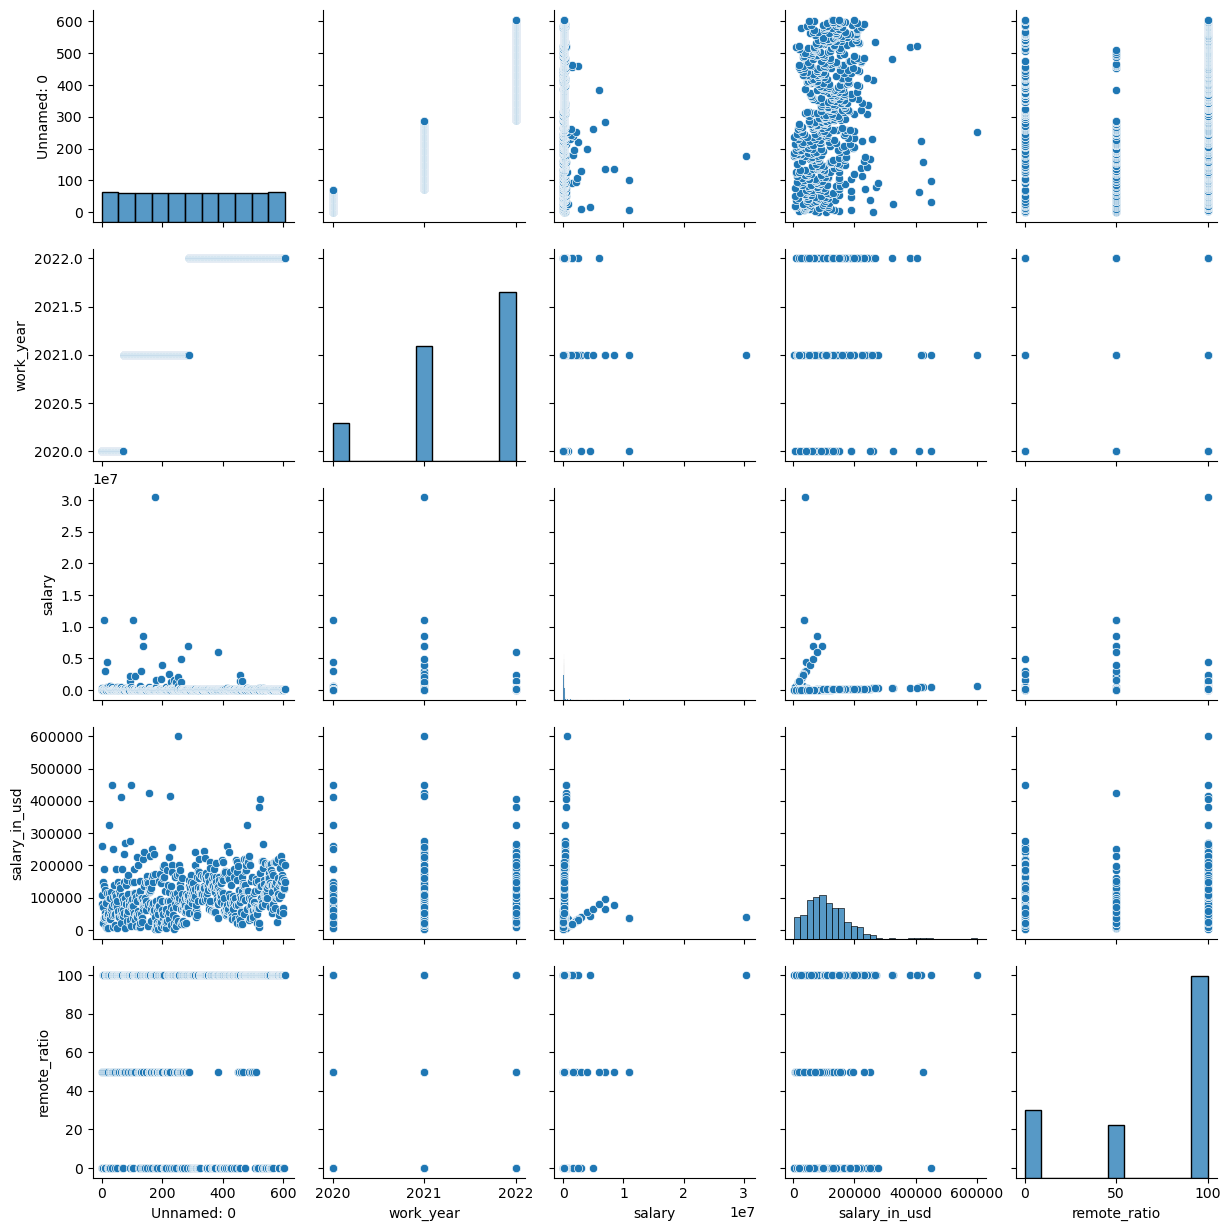

In [97]:
sns.pairplot(df)